In [11]:
from tqdm.notebook import tqdm

import catalog
import waveform

tqdm.pandas()
catalog.display_parameters()

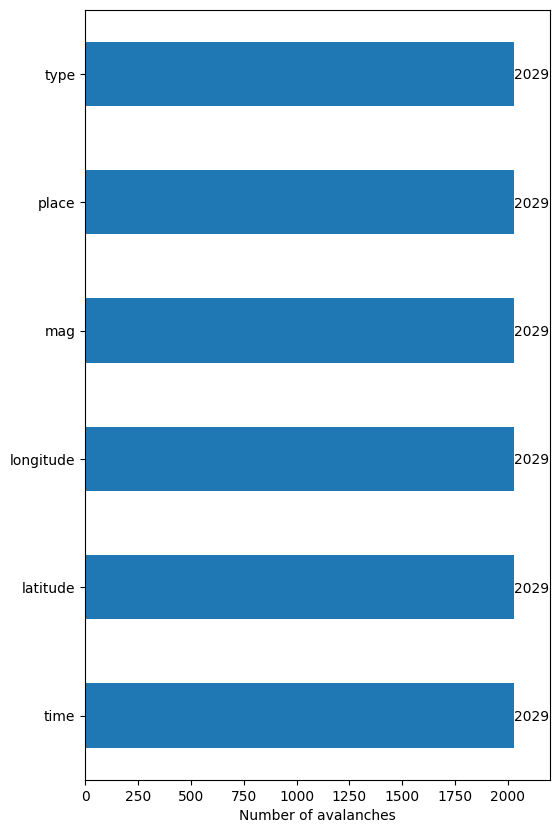

In [12]:
dataframe = catalog.load("data/dataframe.pickle")

catalog.open_plot(dataframe, pos_number=0.04, xlim=2200)

In [28]:
from obspy import UTCDateTime, Stream

In [ ]:
end = []
for i, y in enumerate(dataframe["time"]):
    end_unit = UTCDateTime(dataframe["time"][i]) + 300
    end.append(end_unit)

end = pd.Series(end)

In [30]:
UTCDateTime(dataframe.iloc[0].time)

2024-11-01T17:19:14.776000Z

In [29]:
UTCDateTime(dataframe.iloc[0].time) + 300

2024-11-01T17:24:14.776000Z

In [32]:
dataframe["inventory"] = dataframe.progress_apply( 
    lambda row: waveform.download_inventory(row, maxradius=5, retries=3), axis=1
)

dataframe.to_pickle("data/dataframe_with_inventory.pickle")

  0%|          | 0/2029 [00:00<?, ?it/s]

Error for download inventory. Attempt 1 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 2 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 3 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 1 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 2 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 3 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 1 of 3. Error: No data available for request.
HTTP Status code: 204
Detailed response of server:


Error for download inventory. Attempt 2 o

OSError: Cannot save file into a non-existent directory: 'catalog'

In [33]:
dataframe.to_pickle("data/dataframe_with_inventory.pickle")

In [ ]:
for event in tqdm(dataframe.itertuples(), total=len(dataframe)):
    #if event.Index == 0 : ## Uncomment this line to download a specific event
        stream = waveform.download_stream(event, time_margins=100, print_error=True)
        if stream:
            stream.write(f"sismogrammes/{event.Index:03d}.pickle", format="PICKLE")